<a href="https://colab.research.google.com/github/D1emonk/My-repo/blob/dev/lesson7_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 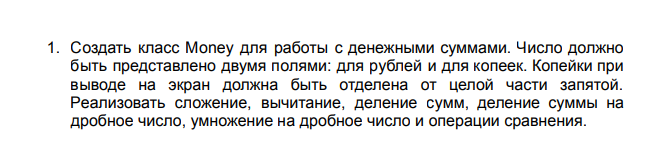

In [4]:
class Money:
    def __init__(self, rubles: int, kopecks: int):
        self.rubles = rubles
        self.kopecks = kopecks
        self._normalize()

    def _normalize(self):
        "Приведение значений рублей и копеек в нормальный вид."
        if self.kopecks >= 100:
            self.rubles += self.kopecks // 100
            self.kopecks %= 100
        elif self.kopecks < 0:
            self.rubles -= (-self.kopecks) // 100 + 1
            self.kopecks = 100 - (-self.kopecks) % 100
        if self.rubles < 0 and self.kopecks > 0:
            self.rubles += 1
            self.kopecks -= 100

    def __str__(self):
        'Возвращает строку в формате "рубли,копейки".'
        return f"{self.rubles},{abs(self.kopecks):02d}"

    def __add__(self, other):
        "Сложение двух объектов Money."
        if isinstance(other, Money):
            return Money(self.rubles + other.rubles, self.kopecks + other.kopecks)
        raise TypeError("Можно складывать только объекты Money.")

    def __sub__(self, other):
        "Вычитание двух объектов Money."
        if isinstance(other, Money):
            return Money(self.rubles - other.rubles, self.kopecks - other.kopecks)
        raise TypeError("Можно вычитать только объекты Money.")

    def __mul__(self, factor):
        """Умножение денежной суммы на int или float Money."""
        if isinstance(factor, (int, float)):
            total_kopecks = (self.rubles * 100 + self.kopecks) * factor
            return Money(int(total_kopecks) // 100, int(total_kopecks) % 100)
        raise TypeError("Умножать можно только на число.")

    def __truediv__(self, divisor):
        "Деление денежной суммы на int или float Money."
        if isinstance(divisor, (int, float)):
            if divisor == 0:
                raise ZeroDivisionError("Деление на ноль невозможно.")
            total_kopecks = (self.rubles * 100 + self.kopecks) / divisor
            return Money(int(total_kopecks) // 100, int(total_kopecks) % 100)
        elif isinstance(divisor, Money):
            total_self = self.rubles * 100 + self.kopecks
            total_other = divisor.rubles * 100 + divisor.kopecks
            return total_self / total_other
        raise TypeError("Делить можно только на int или float Money.")

    def __eq__(self, other):
        "Проверка на равенство двух объектов Money."
        if isinstance(other, Money):
            return self.rubles == other.rubles and self.kopecks == other.kopecks
        return False

    def __lt__(self, other):
        "Проверка: меньше ли текущая сумма другой."
        if isinstance(other, Money):
            return (self.rubles, self.kopecks) < (other.rubles, other.kopecks)
        return False

    def __le__(self, other):
        "Проверка: меньше или равно."
        return self == other or self < other

    def __gt__(self, other):
        "Проверка: больше ли текущая сумма другой."
        return not self <= other

    def __ge__(self, other):
        "Проверка: больше или равно."
        return not self < other

money1 = Money(10, 50)
money2 = Money(5, 75)

print("Money1:", money1)
print("Money2:", money2)
print("Сумма:", money1 + money2)
print("Разность:", money1 - money2)
print("Умножение:", money1 * 2.5)
print("Деление на число:", money1 / 2)
print("Сравнение:", money1 > money2)

Money1: 10,50
Money2: 5,75
Сумма: 16,25
Разность: 4,75
Умножение: 26,25
Деление на число: 5,25
Сравнение: True


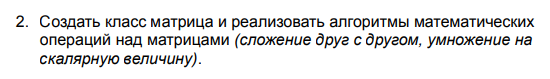


In [4]:
class Matrix:
    def __init__(self, data):

       # Конструктор для инициализации матрицы.
       # :param data: Двумерный список, представляющий матрицу.

        self.data = data

    def __str__(self):

       # Печать матрицы в удобочитаемом формате.

        return "\n".join(["\t".join(map(str, row)) for row in self.data])

    def add(self, other):

        #Сложение текущей матрицы с другой матрицей.

        # Проверим, чтобы размеры матриц совпадали
        if len(self.data) != len(other.data) or len(self.data[0]) != len(other.data[0]):
            raise ValueError("Размеры матриц не совпадают для сложения")

        result = []
        for i in range(len(self.data)):
            row = []
            for j in range(len(self.data[0])):
                row.append(self.data[i][j] + other.data[i][j])
            result.append(row)

        return Matrix(result)

    def multiply_by_scalar(self, scalar):

        # Умножение матрицы на скаляр.

        result = []
        for row in self.data:
            result.append([elem * scalar for elem in row])

        return Matrix(result)

matrix1 = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix2 = Matrix([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

# Сложение матриц
matrix3 = matrix1.add(matrix2)
print("Сложение матриц:")
print(matrix3)

# Умножение матрицы на скаляр
matrix4 = matrix1.multiply_by_scalar(2)
print("Умножение матрицы на 2:")
print(matrix4)

Сложение матриц:
10	10	10
10	10	10
10	10	10
Умножение матрицы на 2:
2	4	6
8	10	12
14	16	18
